In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
from datetime import datetime
from pandas.api.types import is_datetime64_any_dtype as is_datetime
%config Completer.use_jedi = False


In [103]:
def plot_cumulative_frequency_percentage(plt, axs, position, data, bins, callback = None):
    [x, y] = position
    n, bins, patches = axs[x, y].hist(x=data, bins=bins, color='#2596be',
                         density=True, cumulative=True, edgecolor='black', linewidth=1.2)
    axs[x, y].grid(axis='y', alpha=0.75)
    axs[x, y].set_xlabel('')
    axs[x, y].set_ylabel('Frequency %')
    axs[x, y].set_title('Cumulatice Frequency Percentage')
    if callback != None:
        callback(n, bins, patches)

def plot_frequency_percentage(plt, axs, position, data, bins, callback = None):
    [x, y] = position
    n, bins, patches = axs[x, y].hist(x=data, bins=bins, color='#2596be',
                         density=True, edgecolor='black', linewidth=1.2)
    axs[x, y].grid(axis='y', alpha=0.75)
    axs[x, y].set_xlabel('')
    axs[x, y].set_ylabel('Frequency %')
    axs[x, y].set_title('Frequency Percentage')
    if callback != None:
        callback(n, bins, patches)


def plot_cumulative_frequency_count(plt, axs, position, data, bins, callback = None):
    [x, y] = position
    n, bins, patches = axs[x, y].hist(x=data, bins=bins, color='#2596be',
                         cumulative=True, edgecolor='black', linewidth=1.2)
    axs[x, y].grid(axis='y', alpha=0.75)
    axs[x, y].set_xlabel('')
    axs[x, y].set_ylabel('Frequency (n)')
    axs[x, y].set_title('Cumulative Frequency Count')
    if callback != None:
        callback(n, bins, patches)

def plot_frequency_count(plt, axs, position, data, bins, callback = None):
    [x, y] = position
    n, bins, patches = axs[x, y].hist(x=data, bins=bins, color='#2596be',
                         edgecolor='black', linewidth=1.2)
    axs[x, y].grid(axis='y', alpha=0.75)
    axs[x, y].set_xlabel('')
    axs[x, y].set_ylabel('Frequency (n)')
    axs[x, y].set_title('Frequency Count')
    if callback != None:
        callback(n, bins, patches)

class StatisticsCalculator(object):
    
    def __init__(self, data):
        self.data = data

    def avg(self, columnName):
        return self.data[columnName].mean()
    
    def desvpad(self, columnName, underN = False):
        return self.data[columnName].std(ddof=0) if (underN) else self.data[columnName].std() 

    def sumUp(self, columnName):
        return self.data[columnName].sum()
    
    def median(self, columnName):
        return self.data[columnName].median()

    def secondQuartile(self, columnName):
        return self.data[columnName].quantile(0.25)
    
    def thirdQuartile(self, columnName):
        return self.data[columnName].quantile(0.75)

    def describeData(self, columnName):
        return self.data[columnName].describe()

    def PowN(self, columnName, n = 2):
        return self.data[columnName] ** n
    
    def XY(self, columnName1, columnName2,):
        return self.data[columnName1] * self.data[columnName2]

    def maximum(self, columnName,):
        return self.data[columnName].max()

    def minimum(self, columnName,):
        return self.data[columnName].min()
        
    def amplitude(self, columnName,):
        return self.maximum(columnName) - self.minimum(columnName)
        
    def plotHistogram(self, columnName, bins = 'auto'):
        # An "interface" to matplotlib.axes.Axes.hist() method
        fig, axs = plt.subplots(2, 2)
        plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.8,hspace=0.8)
        
        def print_callback(n, bins, patches):
            pass
        plot_frequency_percentage(fig, axs, [0, 0], self.data[columnName], bins, print_callback)
        plot_cumulative_frequency_percentage(fig, axs, [0, 1], self.data[columnName], bins, print_callback)
        plot_cumulative_frequency_count(fig, axs, [1, 1], self.data[columnName], bins, print_callback)
        plot_frequency_count(fig, axs, [1, 0], self.data[columnName], bins, print_callback)
    
    def plotScatter(self, columnName1, columnName2, title = "", withLinearRegression = True):
        plt.scatter(x=self.data[columnName1], y=self.data[columnName2])
        if withLinearRegression:
            [a, b] = self.linearEquationPolyFit(columnName1, columnName2)
            print(self.data[columnName1])
            if (is_datetime(self.data[columnName1])):
                plt.plot(self.data[columnName1], a * mdates.date2num(self.data[columnName1]) + b)
                plt.xticks(rotation=90,)
            else:
                plt.plot(self.data[columnName1], a * self.data[columnName1] + b)

        plt.grid(axis='y', alpha=0.75)
        plt.xlabel(columnName1)
        plt.ylabel(columnName2)
        plt.title(title)
    
    # r = (sumXY - sumX*sumY/n)/sqrt((sumx²-(sumx)^2/n) * sumy²-(sumy)^2/n)
    def coefCorrelation(self, columnName1, columnName2):
        length = self.data.shape[0]
        numerator = (self.XY(columnName1, columnName2).sum() - self.data[columnName1].sum() * self.data[columnName2].sum()/length)
        denominator = math.sqrt((self.PowN(columnName1).sum() - self.data[columnName1].sum()**2/length) *  (self.PowN(columnName2).sum() - self.data[columnName2].sum()**2/length))
        return numerator/denominator

    # a = (sumXY - sumX*sumY/n)/(sumx²-(sumx)^2/n)
    # b = avgY - a avgX
    def linearEquation(self, columnName1, columnName2):
        length = self.data.shape[0]
        aNumerator = self.XY(columnName1, columnName2).sum() - self.data[columnName1].sum() * self.data[columnName2].sum()/length 
        print(self.PowN(columnName1).sum())
        print(self.data[columnName1].sum())
        aDenominator = self.PowN(columnName1).sum() - self.data[columnName1].sum() ** 2/length 
        a = aNumerator/aDenominator
        b = self.avg(columnName2) - a * self.avg(columnName1) 
        return [a ,b]
    
    # With PoliFit
    def linearEquationPolyFit(self, columnName1, columnName2):
        #find line of best fit
        if (is_datetime(self.data[columnName1])):
            return np.polyfit(mdates.date2num(self.data[columnName1]), self.data[columnName2], 1)
        return np.polyfit(self.data[columnName1], self.data[columnName2], 1)
    

0   2019-01-20
1   2019-02-20
2   2019-03-20
3   2019-04-20
4   2019-05-20
5   2019-06-20
6   2019-07-20
7   2019-08-20
8   2019-09-20
9   2019-10-20
Name: Date, dtype: datetime64[ns]


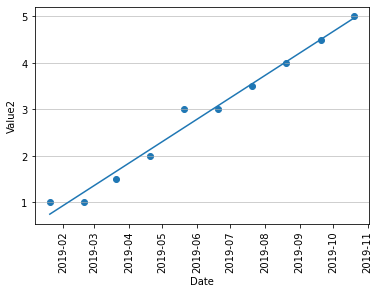

In [104]:


dataframe = pd.DataFrame([
    [datetime(2019,1,20), 215, 1],
    [datetime(2019,2,20), 480, 1],
    [datetime(2019,3,20), 325, 1.5],
    [datetime(2019,4,20), 550, 2],
    [datetime(2019,5,20), 920, 3],
    [datetime(2019,6,20), 670, 3],
    [datetime(2019,7,20), 825, 3.5],
    [datetime(2019,8,20), 1070, 4],
    [datetime(2019,9,20), 1350, 4.5],
    [datetime(2019,10,20), 1215, 5],
],columns=['Date', 'Value', 'Value2'])

statisics = StatisticsCalculator(dataframe)
# print(statisics.coefCorrelation('Value', 'Value2'))
statisics.plotScatter('Date', 'Value2')
# print(statisics.linearEquationPolyFit('Value', 'Value2'))
# print(statisics.linearEquation('Value', 'Value2'))
# print(statisics.describeData('Value'))
# print(statisics.XY('Value', 'Value2'))
# print(statisics.PowN('Value', 3))
# statisics.plotHistogram('Value', 3)
# statisics.maximum('Value')
# statisics.minimum('Value')
# statisics.amplitude('Value')

